<a href="https://colab.research.google.com/github/saad3223/ML-Projects/blob/main/Econ_441B_Week_8_HW_Saad_Bousbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [98]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [100]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [101]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/bank-additional-full.csv", sep = ";")

In [102]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [104]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [105]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

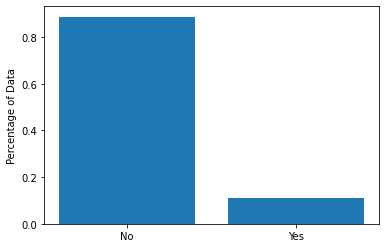

In [106]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [107]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [137]:
# Using SMOTE to balance the classes:

from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_scaled, y_train = oversample.fit_resample(X_scaled,y_train)

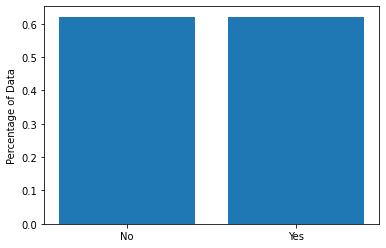

In [138]:
obs1 = len(y)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

It can be seen from the bar chart that the impalance is resolved. 

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [139]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'contact_telephone <= 0.5\ngini = 0.378\nsamples = 24128\nvalue = [18034, 6094]\nclass = No'),
 Text(0.125, 0.375, 'duration <= 124.5\ngini = 0.454\nsamples = 17046\nvalue = [11100, 5946]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.262\nsamples = 6885\nvalue = [5816, 1069]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.499\nsamples = 10161\nvalue = [5284, 4877]\nclass = No'),
 Text(0.375, 0.375, 'month_oct <= 0.5\ngini = 0.041\nsamples = 7082\nvalue = [6934, 148]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.034\nsamples = 7002\nvalue = [6881, 121]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.447\nsamples = 80\nvalue = [53, 27]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 0.5\ngini = 0.402\nsamples = 27032\nvalue = [7546, 19486]\nclass = Yes'),
 Text(0.625, 0.375, 'month_jul <= 0.5\ngini = 0.317\nsamples = 22869\nvalue = [4520, 18349]\nclass = Yes'),


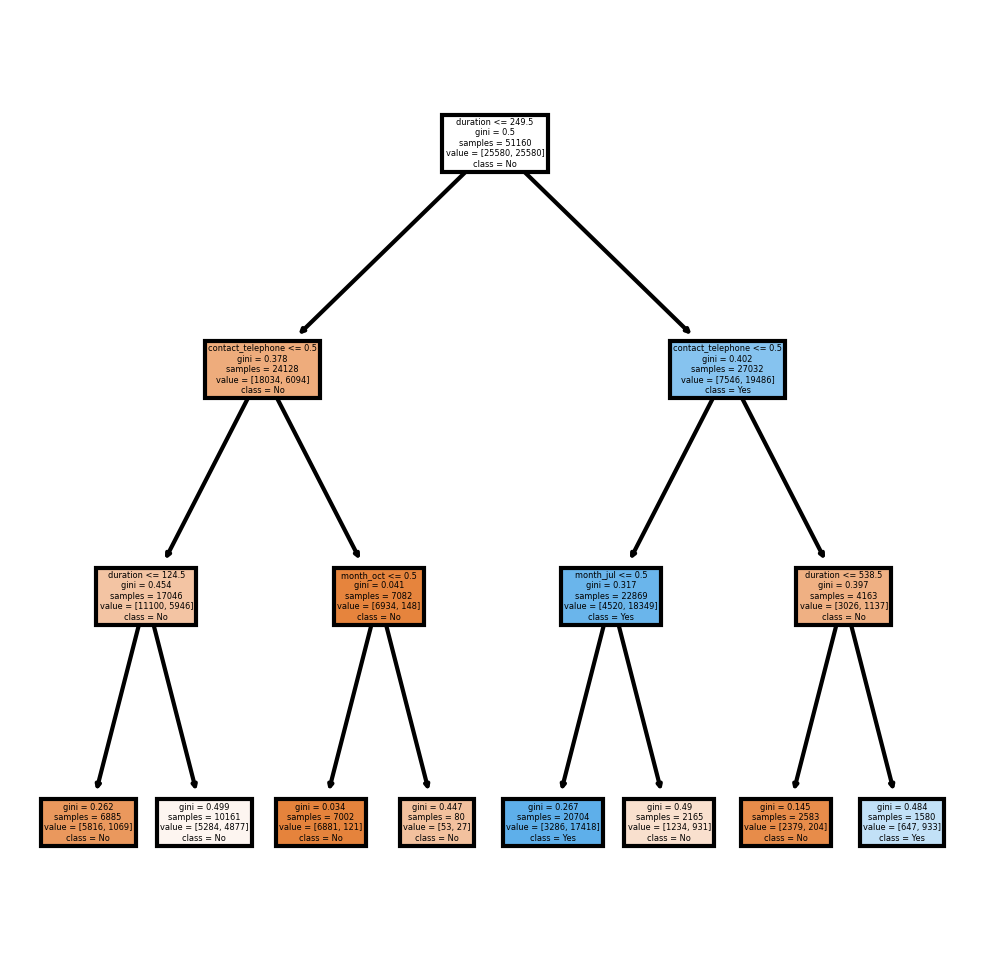

In [140]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [141]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy*100))

Decision Tree Accuracy: 88.76%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


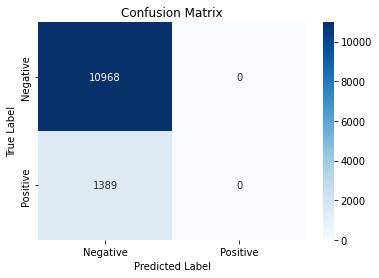

In [142]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [143]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8875940762320952


In [144]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


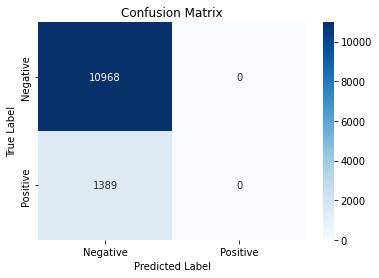

In [145]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [147]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [148]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
print("Boost Accuracy: {:.2f}%".format(accuracy*100))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Boost Accuracy: 88.78%


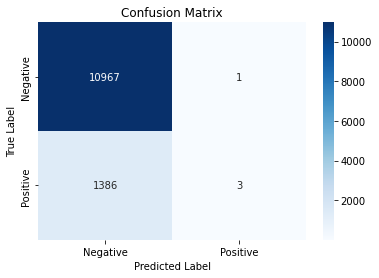

In [149]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [150]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from mlens.ensemble import SuperLearner

In [152]:
### SET YOUR BASE LEARNERS
base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    GradientBoostingClassifier(),
    QuadraticDiscriminantAnalysis()
]

super_learner = SuperLearner(folds=10, random_state=42)
super_learner.add(base_estimators)

### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_predictions = super_learner.predict(X_scaled)

base_predictions


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [153]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions,y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.war

In [154]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[ 1.2326571 , -1.04380629,  0.45578122, -7.02533357, 14.0655952 ]])

The coefficients in a superlearner model indicate the contribution or weight of each base learner's prediction to the final prediction, and their sign indicates the direction of this contribution.  In this particular model, we observed that QDA (#5) has the highest weight and contributes positively to the final prediction, while KNN (#3) has the lowest weight and contributes positively as well. 


SuperLearner Accuracy:39.61%


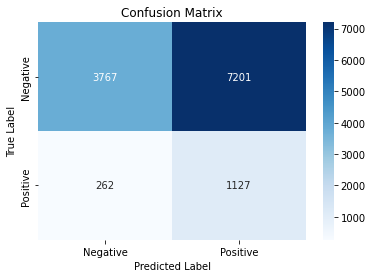

In [155]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_true = y_test
cm_SuperLearner = confusion_matrix(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
print("SuperLearner Accuracy:{:.2f}%".format(accuracy*100))

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_SuperLearner, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [156]:
# Decision Tree
sen_raw = cm_raw[0,0]/(cm_raw[0,0]+cm_raw[0,1])
spec_raw = cm_raw[1,1]/(cm_raw[1,1]+cm_raw[1,0])

# Bagging
sen_bag = cm_bag[0,0]/(cm_bag[0,0]+cm_bag[0,1])
spec_bag = cm_bag[1,1]/(cm_bag[1,1]+cm_bag[1,0])

# Boosting
sen_boost = cm_boost[0,0]/(cm_boost[0,0]+cm_boost[0,1])
spec_boost = cm_boost[1,1]/(cm_boost[1,1]+cm_boost[1,0])

# Super Learner
sen_SuperLearner = cm_SuperLearner[0,0]/(cm_SuperLearner[0,0]+cm_SuperLearner[0,1])
spec_SuperLearner = cm_SuperLearner[1,1]/(cm_SuperLearner[1,1]+cm_SuperLearner[1,0])

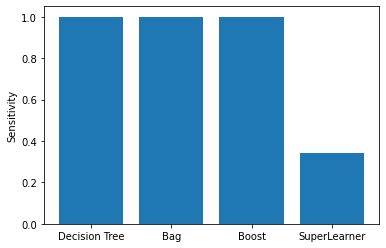

In [157]:
# Sensitivities Bar Chart 
plt.bar(["Decision Tree","Bag","Boost","SuperLearner"],[sen_raw,sen_bag,sen_boost,sen_SuperLearner])
plt.ylabel("Sensitivity")
plt.show()

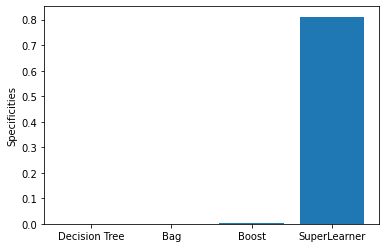

In [158]:
# Specificities Bar Chart 
plt.bar(["Decision Tree","Bag","Boost","SuperLearner"],[spec_raw,spec_bag,spec_boost,spec_SuperLearner])
plt.ylabel("Specificities")
plt.show()